### Medical_Insurance_Cost_Prediction

### Introduction

Medical expenses is one of the major recurring expenses in a human life.

Health insurance is an insurance product which covers medical and surgical expenses of an insured individual.

It reimbeurses the expenses incurred due toillness or injury or pays the care provider of the insured individual directly.

It is important because cost towards good medical facilities and hospitalisation can be financially stressful.

### Problem Statement
In the given Project we have to predict the insurance cost to make money.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population.

The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments.

#### Importing libraries

To perform various operations and for visualizing the data

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the data

In [5]:
data = pd.read_csv('C:\\Users\\Hp\\Downloads/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Reading and Understanding the data

In [6]:
# Visualise the top 10 records
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:
# Last 5
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
# Random five recordes from data
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.440,1,no,southeast,8240.58960
1182,25,female,30.300,0,no,southwest,2632.99200
1193,48,female,36.575,0,no,northwest,8671.19125
523,38,female,37.730,0,no,southeast,5397.61670
316,50,male,32.205,0,no,northwest,8835.26495


In [9]:
# Gives no. of rows and no. of columns using shape function
data.shape

(1338, 7)

There are 1338 rows and 7 columns in our data

In [10]:
data.duplicated().sum()

1

In [11]:
# Removing duplicates
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# Checking is there any null value in our data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null value is present in our data

In [13]:
# LIST THE TYPES OF ALL THE COLUMNS IN OUR DATASET.
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
# .info gives information about data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# describe function = the describe method will help to see how data has been spread for numerical values.(stastical information)
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
# To see information of categorical variable
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [17]:
# To see how many males and females in gender column
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

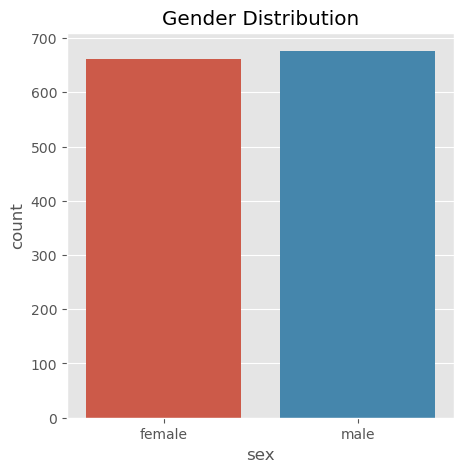

In [18]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(data['sex'])
plt.title('Gender Distribution')
plt.show()

In [19]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

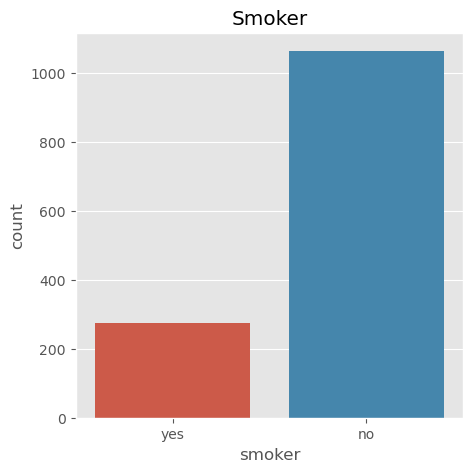

In [20]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(data['smoker'])
plt.title('Smoker')
plt.show()

In [21]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

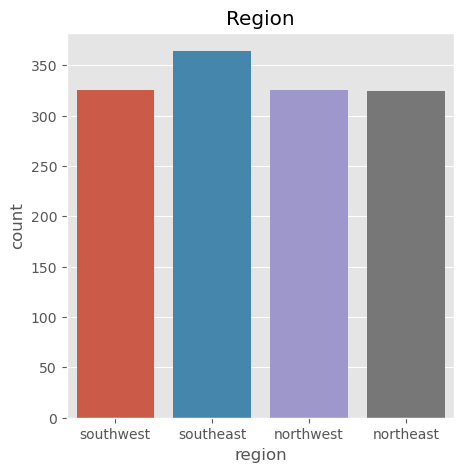

In [22]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(data['region'])
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges vs Region')

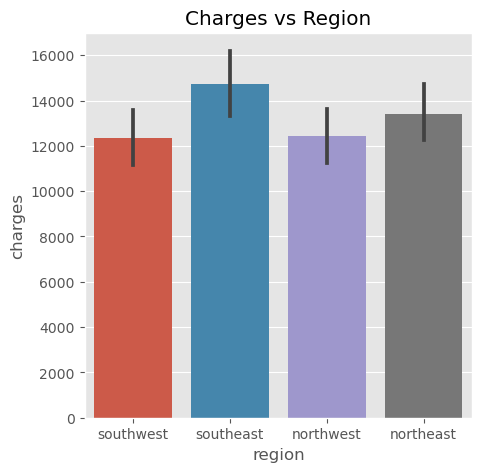

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'region', y='charges',data=data)
plt.title('Charges vs Region')

Text(0.5, 1.0, 'Charges for smoker')

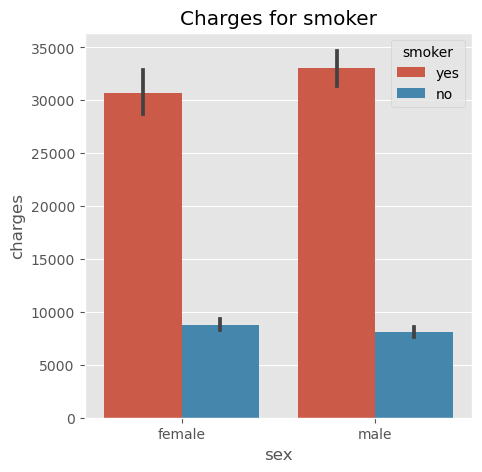

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'sex', y='charges',hue='smoker', data=data)
plt.title('Charges for smoker')

From the plot above we can see that.
1. Medical Charges are more for smoker than the non smoker.
2. Medical Charges are more in Southeast Region

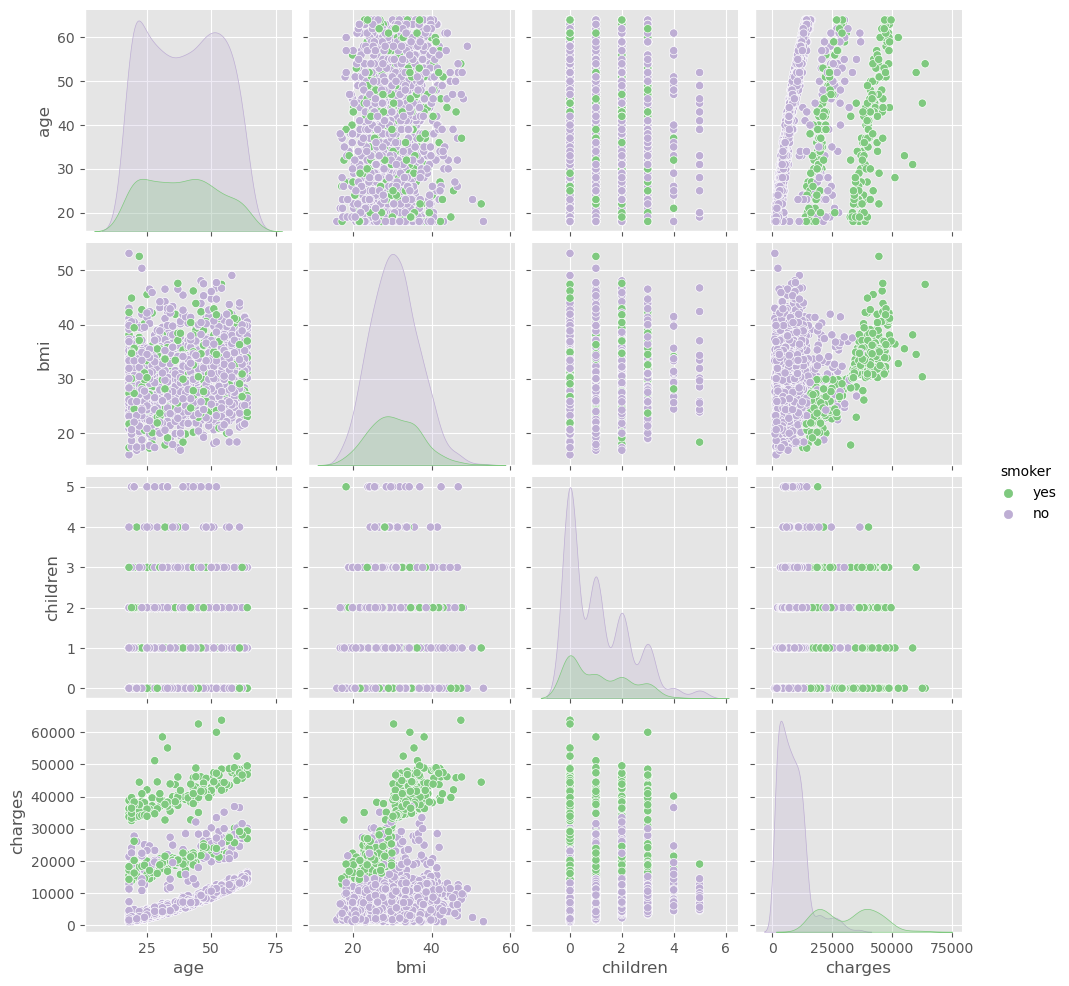

In [25]:
#Pairplot of all numerical variables
sns.pairplot(data,vars=["age", 'bmi','children','charges'], hue='smoker',palette="Accent")
plt.show()

By analysing all the plots above, we can see that,

A trend of increasing charges can be observed from the age vs charge plot.
BMI seems to hold some correlation to charges.
There seems to be a strong correlation between smoking and medical charges

In [26]:
# Converting categorical data into numeric
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get)
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


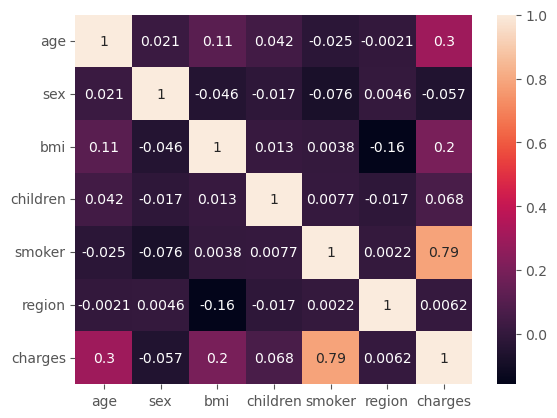

In [28]:
# Finding correlation using heatmap
sns.heatmap(data.corr(), annot = True)
plt.show()

<AxesSubplot:xlabel='charges'>

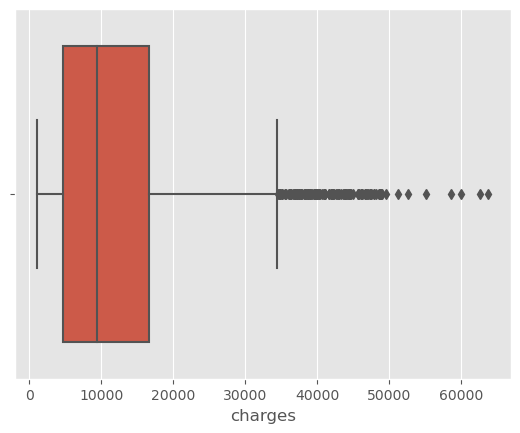

In [29]:
sns.boxplot(data['charges'])

<AxesSubplot:xlabel='age'>

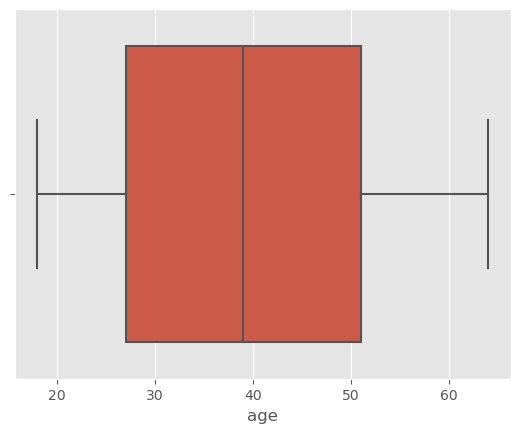

In [30]:
sns.boxplot(data.age)

<AxesSubplot:xlabel='bmi'>

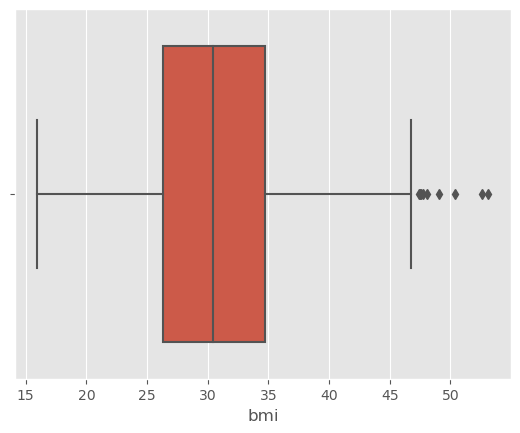

In [31]:
# Check the outliers of bmi column 
sns.boxplot(data.bmi)

Form the above boxplot we can see that outliers are present in bmi column  

In [32]:
# deleting outlier from the Bmi column
Q1 = np.quantile(data['bmi'],0.25)
Q2 = np.quantile(data['bmi'],0.50)
Q3 = np.quantile(data['bmi'],0.75)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

print('The lower fence is: ', + lower_fence)
print('The upper fence is: ', + upper_fence)


The lower fence is:  13.7
The upper fence is:  47.290000000000006


In [33]:
df1 = data['bmi'] > upper_fence
df1.value_counts()

False    1329
True        9
Name: bmi, dtype: int64

In [34]:
percentage_outlier = 9 / 1338 * 100
percentage_outlier

0.672645739910314

Here we can see that there are 0.67% outliers are present in bmi column which can be removed from data.

<AxesSubplot:xlabel='bmi'>

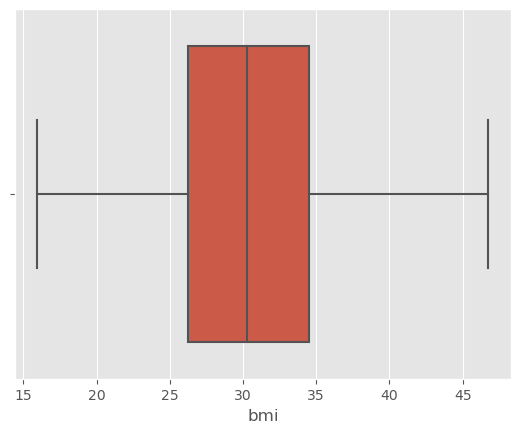

In [35]:
# Removig the outlier from bmi column
df = data.loc[(data['bmi']<= upper_fence) & (data['bmi']>= lower_fence)]
sns.boxplot(df.bmi)


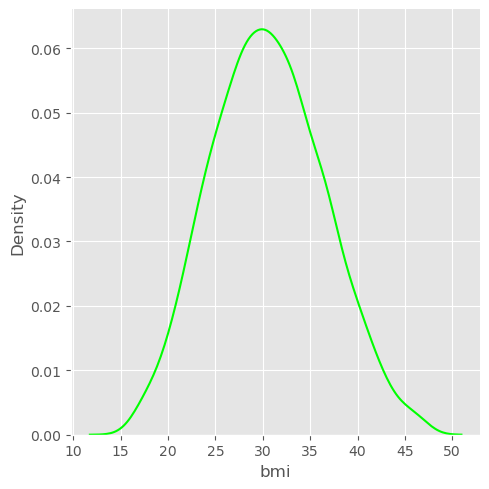

In [36]:
sns.displot(df['bmi'],kind='kde',color='lime')

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [39]:
X = df.drop(['charges'], axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,4
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [41]:
Y = df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

###### Standardization

In [43]:
x = (X - X.mean())/X.std()
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438223,1.007932,-0.445502,-0.907598,1.975126,-1.343687
1,-1.509408,-0.991384,0.546061,-0.079734,-0.505916,-0.439962
2,-0.797554,-0.991384,0.415992,1.575994,-0.505916,-0.439962
3,-0.441628,-0.991384,-1.323044,-0.907598,-0.505916,0.463762
4,-0.512813,-0.991384,-0.279960,-0.907598,-0.505916,0.463762


###### Spliting data into training and testing

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,train_size=0.8, random_state=12)  #random_state=12 is used to confirm training and testing dataset otherwise it will be change
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1063, 6), (1063,), (266, 6), (266,))

### 1. Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [47]:
# Fit the model to training data
lm.fit(X_train,Y_train)

LinearRegression()

In [48]:
# print the intercept
print(lm.intercept_)

13213.590406485522


In [49]:
# let see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,3637.132983
sex,-23.427466
bmi,2048.667990
children,593.418442
smoker,9483.103923
region,357.953133


In [50]:
# Making Predictions using the model
Y_pred = lm.predict(X_test)
print(Y_pred)

[12188.22256378  8320.73480295 11790.59175189 16706.28539007
  5541.42628488 33487.83473627  5095.74157638 36134.29121787
   816.76281774 32602.85580057 14467.49520902 37114.92039365
  3922.51254206  2772.91092016 11618.2072182   4758.76738131
 11500.56985741  4168.05211796  7481.76869265 10007.34352367
 12085.49843336 11770.27711335  9760.26606163  5698.77340938
 22904.97768228 12712.06912569 13866.42314769 15098.41882311
  7097.98398873 28585.93152067 11454.78763692  2853.7969505
 26649.05675542 33452.42243583 38941.05534665 39571.9599781
  8550.61071406  2853.7969505  10464.31069813 11569.96560526
  6270.50721431 12155.30058509 11437.40539303  9052.49744382
 12019.74666983 13021.15738956  9243.20261956 -1354.16231658
  7774.66613358  3578.22703524 27914.49226063 10081.76218624
 14865.2360113  31337.89208215  3871.37257429 17036.21545062
  1172.08965053   888.75740091  8102.98407373  6904.61718175
 33510.7400785   4613.96029893  4560.95293693 15210.89245663
  1143.07985588  7939.7960

###### Performance Metrics

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,Y_pred))
print('MAE:', mean_absolute_error( Y_test,Y_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,Y_pred)))

MSE: 31964070.629558142
MAE: 4009.4547826867224
RMSE: 5653.677619882314


In [52]:
# R square 
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

0.7702022720483183


In [53]:
## Adusted r2 
# Display adjusted r2
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7648787725590901

### 2. Ridge Regression Model

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridge = Ridge()

In [56]:
ridge

Ridge()

In [57]:
ridge.fit(X_train, Y_train)

Ridge()

In [58]:
# Coefficient 
print(pd.DataFrame(ridge.coef_,X_test.columns,columns = ['Coefficient']))

          Coefficient
age       3633.623458
sex        -24.065515
bmi       2046.879192
children   593.200250
smoker    9474.115472
region     357.255491


In [59]:
# Print the intercept
print(ridge.intercept_)

13213.676653125955


In [60]:
ridge_pred = ridge.predict(X_test)

In [61]:
ridge_pred

array([12187.72456472,  8326.27016297, 11792.23505063, 16702.96892742,
        5549.2043171 , 33469.28548515,  5103.09350508, 36113.52624292,
         828.19896403, 32584.06830163, 14467.17760968, 37093.14220338,
        3933.05009568,  2781.51298293, 11620.59130651,  4767.28195702,
       11502.43189674,  4176.36127788,  7486.86258955, 10010.09335128,
       12085.06636951, 11770.86384252,  9763.16968228,  5706.12428483,
       22895.24071072, 12713.04571988, 13865.30448379, 15097.43989728,
        7102.98902604, 28570.89692855, 11455.32090859,  2863.96920799,
       26636.87662266, 33434.28890807, 38916.51938967, 39548.0364195 ,
        8555.27027922,  2863.96920799, 10465.87511627, 11572.50734368,
        6276.4569496 , 12156.37203067, 11440.11506001,  9056.0488801 ,
       12019.37201725, 13021.54917398,  9248.23672007, -1339.61983234,
        7780.96339697,  3587.52450359, 27902.20515483, 10085.39139442,
       14863.52706408, 31320.04138305,  3881.35237376, 17032.93517036,
      

##### Performance  Metrics

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,ridge_pred))
print('MAE:', mean_absolute_error( Y_test,ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,ridge_pred)))

MSE: 31964974.353929933
MAE: 4010.643376793312
RMSE: 5653.7575429027665


In [63]:
# R square

from sklearn.metrics import r2_score
score = r2_score(Y_test, ridge_pred)
print(score)


0.7701957749469404


In [64]:
# Display Adjusted r2
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7648721249457112

### 3. Lasso regression model

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso()

In [67]:
lasso

Lasso()

In [68]:
lasso.fit(X_train, Y_train)

Lasso()

In [69]:
# Print Coefficient
print(pd.DataFrame(lasso.coef_,X_test.columns, columns = ['Coefficient']))

          Coefficient
age       3636.214277
sex        -22.528753
bmi       2047.634532
children   592.533258
smoker    9482.149991
region     356.722978


In [70]:
print(lasso.intercept_)

13213.60348197703


In [71]:
# Prediction for data set
lasso_pred = lasso.predict(X_test)

In [72]:
lasso_pred

array([12187.83570424,  8322.75592629, 11789.42189226, 16702.36787517,
        5541.35063926, 33484.01935138,  5098.38832713, 36128.87997921,
         822.51664961, 32599.96475825, 14467.55266657, 37112.85967186,
        3923.95650714,  2774.86087874, 11619.11511929,  4761.49746757,
       11499.44439983,  4172.46994964,  7485.59495836, 10006.66596486,
       12085.22860331, 11771.93294929,  9763.2975007 ,  5697.70654431,
       22909.24999947, 12708.3487995 , 13865.16827184, 15096.55737395,
        7099.55658558, 28586.55663607, 11453.89451246,  2854.94666877,
       26649.1099004 , 33449.27592017, 38939.62245834, 39568.65979431,
        8552.52838993,  2854.94666877, 10463.46075352, 11565.65580923,
        6269.98366027, 12156.80596225, 11434.72641205,  9054.29345518,
       12019.51000848, 13019.65612608,  9242.2163071 , -1348.99280751,
        7776.18020378,  3577.96904724, 27913.66146081, 10082.45916907,
       14862.24722004, 31334.84880173,  3873.90604447, 17033.14524703,
      

###### Performance metrics

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,lasso_pred))
print('MAE:', mean_absolute_error( Y_test,lasso_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,lasso_pred)))

MSE: 31963472.384155072
MAE: 4009.2744114026486
RMSE: 5653.6247120015905


In [74]:
# R square
from sklearn.metrics import r2_score
score = r2_score(Y_test, lasso_pred)
print(score)


0.7702065729847033


In [75]:
# Adjusted r2
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.764883173131067

### Elastic net Regression Model 

In [76]:
from sklearn.linear_model import ElasticNet

In [77]:
elastic = ElasticNet()

In [78]:
elastic

ElasticNet()

In [79]:
elastic.fit(X_train,Y_train)

ElasticNet()

In [80]:
# Printing coefficient
print(elastic.coef_)

[2403.46601578 -173.28275069 1404.72522303  478.06589018 6308.45688973
  150.39152368]


In [81]:
#Printing intercept
print(elastic.intercept_)

13243.284214843588


In [82]:
# Prediction for data set
elastic_pred = elastic.predict(X_test)

In [83]:
elastic_pred

array([12183.5779297 , 10175.54979265, 12337.89327289, 15544.34141151,
        8245.12562956, 26863.87960356,  7744.26789235, 28704.24505692,
        4896.16708393, 26008.2667992 , 14266.94763597, 29334.03097874,
        7457.88184687,  5965.90146884, 12371.19338197,  7723.38981231,
       12138.04881276,  7148.02434644,  9324.58446683, 11027.12710582,
       12106.70476944, 12075.23570625, 10840.85260888,  8274.53758211,
       19533.76670171, 13007.12795119, 13538.02198528, 14678.03520265,
        8954.99457347, 23337.71552382, 11778.22450901,  6415.15419296,
       22290.80418813, 26943.82580315, 30305.01053424, 31018.76735141,
       10192.65380523,  6415.15419296, 11144.13977435, 12361.16806259,
        8456.21575854, 12536.53996468, 12284.37641913, 10355.30793461,
       12061.62027496, 13142.0559218 , 10890.52645569,  3701.64781619,
        9878.37349668,  6846.27718567, 23395.39535727, 11308.87122922,
       14281.97556607, 25112.78057753,  7284.67869328, 15850.02740254,
      

###### Performance metrics

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MSE:',mean_squared_error( Y_test,elastic_pred))
print('MAE:', mean_absolute_error( Y_test,elastic_pred))
print("RMSE:", np.sqrt(mean_squared_error( Y_test,elastic_pred)))

MSE: 44108062.69136073
MAE: 4953.239226823902
RMSE: 6641.3901173896365


In [85]:
# R square
from sklearn.metrics import r2_score
score = r2_score(Y_test, elastic_pred)
print(score)

0.6828960645127586


In [86]:
# Adjusted r2
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6755500273972241

#### Conclusion

From above Models we can say that we get approximately same accuracy (r2 value) in Linear Regression model and by using ridge and lasso 

If we use ElasticNet model then there is underfiting problem 

Therefore we can not apply ElasticNet here

We Simply go with LinearRegression